### Identify factors impacting the number of consultations with non-doctor health profesional Using Poisson Regression

In [1]:
myData = read.csv("C:/Users/Smita/Desktop/CDA/midterm/mydata.csv")

In [2]:
# removed indices column
myData = myData[, 2:14]

In [3]:
colnames(myData)

[1] "SEX"      "AGE"      "AGESQ"    "INCOME"   "LEVYPLUS" "FREEPOOR"
 [7] "FREEREPA" "ILLNESS"  "ACTDAYS"  "HSCORE"   "CHCOND1"  "CHCOND2" 
[13] "NONDOCCO"

In [9]:
head(myData,3)

,SEX,AGE,AGESQ,INCOME,LEVYPLUS,FREEPOOR,FREEREPA,ILLNESS,ACTDAYS,HSCORE,CHCOND1,CHCOND2,NONDOCCO
1,1.0000,0.7200,0.5184,0.2500,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000
2,1.0000,0.6200,0.3844,0.2500,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000
3,0.0000,0.5700,0.3249,0.1500,1.0000,0.0000,0.0000,5.0000,2.0000,0.0000,0.0000,1.0000,1.0000


In [11]:
# Missing Values in the dataset corresponding to each predictor
na_count = sapply(myData, function(x) length(which(is.na(x)))) ##No missing values

### Convert categorical variable as factor

In [12]:
myData$SEX = as.factor(myData$SEX)
myData$LEVYPLUS = as.factor(myData$LEVYPLUS)
myData$FREEPOOR = as.factor(myData$FREEPOOR)
myData$FREEREPA = as.factor(myData$FREEREPA)
myData$CHCOND1 = as.factor(myData$CHCOND1)
myData$CHCOND2 = as.factor(myData$CHCOND2)

In [13]:
str(myData)

'data.frame':	400 obs. of  13 variables:
 $ SEX     : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 1 2 2 1 ...
 $ AGE     : num  0.72 0.62 0.57 0.72 0.32 ...
 $ AGESQ   : num  0.518 0.384 0.325 0.518 0.102 ...
 $ INCOME  : num  0.25 0.25 0.15 0.45 0.75 ...
 $ LEVYPLUS: Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 1 1 1 ...
 $ FREEPOOR: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ FREEREPA: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 2 2 ...
 $ ILLNESS : int  1 1 5 5 0 0 5 3 2 2 ...
 $ ACTDAYS : int  0 0 2 0 0 0 0 0 0 0 ...
 $ HSCORE  : int  1 0 0 2 0 2 2 0 2 0 ...
 $ CHCOND1 : Factor w/ 2 levels "0","1": 2 2 1 2 1 1 1 1 1 2 ...
 $ CHCOND2 : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 2 2 2 1 ...
 $ NONDOCCO: int  1 1 1 1 1 2 1 1 7 2 ...


### Model 1

In [14]:
model1 = glm(NONDOCCO ~., data = myData, family = poisson)

In [15]:
summary(model1)


Call:
glm(formula = NONDOCCO ~ ., family = poisson, data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7328  -0.9817  -0.4376   0.2844   3.6900  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.576426   0.284852   2.024   0.0430 *  
SEX1        -0.019002   0.081104  -0.234   0.8148    
AGE         -1.235751   1.458501  -0.847   0.3968    
AGESQ        1.027322   1.506212   0.682   0.4952    
INCOME      -0.290248   0.127461  -2.277   0.0228 *  
LEVYPLUS1    0.263549   0.119333   2.209   0.0272 *  
FREEPOOR1   -0.205028   0.280891  -0.730   0.4654    
FREEREPA1    0.684200   0.139873   4.892 1.00e-06 ***
ILLNESS      0.028545   0.024868   1.148   0.2510    
ACTDAYS      0.042272   0.006624   6.382 1.75e-10 ***
HSCORE       0.019901   0.014152   1.406   0.1597    
CHCOND11     0.047374   0.101703   0.466   0.6414    
CHCOND21     0.193853   0.111997   1.731   0.0835 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*'

### Anova test for model-1

In [16]:
anova(model1, test= "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,399.0000,793.2051,NA
SEX,1.000000e+00,8.960559e+00,3.980000e+02,7.842446e+02,2.758705e-03
AGE,1.000000e+00,2.002078e+01,3.970000e+02,7.642238e+02,7.660499e-06
AGESQ,1.0000000,0.2959205,396.0000000,763.9278803,0.5864513
INCOME,1.000000e+00,1.819568e+01,3.950000e+02,7.457322e+02,1.993304e-05
LEVYPLUS,1.0000000,4.8880828,394.0000000,740.8441173,0.0270427
FREEPOOR,1.00000000,3.46115617,393.00000000,737.38296109,0.06282637
FREEREPA,1.000000e+00,3.391957e+01,3.920000e+02,7.034634e+02,5.743793e-09
ILLNESS,1.000000e+00,9.283231e+00,3.910000e+02,6.941802e+02,2.312611e-03
ACTDAYS,1.000000e+00,5.686640e+01,3.900000e+02,6.373138e+02,4.664473e-14


### Global fit Statistics using Pearson goodness-of-fit

In [17]:
1-pchisq(model1$deviance, model1$df.residual)

[1] 6.405987e-14

### Dispersion test

In [ ]:
library(AER) ## require for dispersion test

In [23]:
model1$deviance/model1$df.residual
dispersiontest(model1, alternative = "two.sided")

[1] 1.628747


	Dispersion test

data:  model1
z = 5.5809, p-value = 2.393e-08
alternative hypothesis: true dispersion is not equal to 1
sample estimates:
dispersion 
  1.779931 


### Model 2 using Stepwise Backward Selection

In [ ]:
a = step(model1, data = myData, direction = 'backward')

In [25]:
a$anova

,Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
1,,NA,NA,387,630.325172777268,1558.43942294096
2,- SEX,1,0.0547939138252787,388,630.379966691093,1556.49421685478
3,- CHCOND1,1,0.195847970555405,389,630.575814661649,1554.69006482534
4,- AGESQ,1,0.422939645393171,390,630.998754307042,1553.11300447073
5,- FREEPOOR,1,0.484546868857478,391,631.483301175899,1551.59755133959
6,- AGE,1,1.03566086163119,392,632.51896203753,1550.63321220122
7,- ILLNESS,1,1.49547755458036,393,634.014439592111,1550.1286897558


### Selected optimal model using Backward Selection

In [26]:
model2 = glm(formula = NONDOCCO ~ INCOME + LEVYPLUS + FREEREPA + ACTDAYS + 
    HSCORE + CHCOND2, family = poisson, data = myData)

In [27]:
summary(model2)


Call:
glm(formula = NONDOCCO ~ INCOME + LEVYPLUS + FREEREPA + ACTDAYS + 
    HSCORE + CHCOND2, family = poisson, data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8257  -1.0180  -0.4334   0.2876   3.6926  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.334764   0.112875   2.966  0.00302 ** 
INCOME      -0.256154   0.118546  -2.161  0.03071 *  
LEVYPLUS1    0.235565   0.105964   2.223  0.02621 *  
FREEREPA1    0.630657   0.109449   5.762 8.31e-09 ***
ACTDAYS      0.041240   0.006559   6.288 3.21e-10 ***
HSCORE       0.026459   0.013433   1.970  0.04887 *  
CHCOND21     0.165730   0.078521   2.111  0.03480 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 793.21  on 399  degrees of freedom
Residual deviance: 634.01  on 393  degrees of freedom
AIC: 1550.1

Number of Fisher Scoring iterations: 5


#### Global-fit test

In [28]:
1-pchisq(model2$deviance, model2$df.residual) ## Pearson Goodness of fit

[1] 1.367795e-13

#### Goodness of fit using anova

In [29]:
anova(model2, test= "Chisq")  ## anova for model comparisions

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,399.0000,793.2051,NA
INCOME,1.000000e+00,3.344302e+01,3.980000e+02,7.597621e+02,7.338280e-09
LEVYPLUS,1.00000000,4.19037332,397.00000000,755.57175405,0.04065414
FREEREPA,1.000000e+00,5.087900e+01,3.960000e+02,7.046928e+02,9.823884e-13
ACTDAYS,1.000000e+00,6.048918e+01,3.950000e+02,6.442036e+02,7.398405e-15
HSCORE,1.00000000,5.80707513,394.00000000,638.39649549,0.01596182
CHCOND2,1.00000000,4.38205590,393.00000000,634.01443959,0.03631917


### Compare model 2 and model 1 using anova

In [30]:
anova(model2, model1, test="Chisq") 

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
1,393.0000,634.0144,NA,NA,NA
2,387.0000000,630.3251728,6.0000000,3.6892668,0.7186417


###  Testing over-under-dispersion

In [31]:
library(AER)
deviance(model2)/model2$df.residual
dispersiontest(model2, alternative = "two.sided")

[1] 1.613268


	Dispersion test

data:  model2
z = 5.5143, p-value = 3.502e-08
alternative hypothesis: true dispersion is not equal to 1
sample estimates:
dispersion 
  1.803513 


### Residual diagnostic

### Modified Poisson Regression

####  Calculate the dispersion parameter 

In [32]:
dp = sum(residuals(model2,type="pearson")^2)/model2$df.res
dp

[1] 1.825207

### Model 3

In [33]:
####  Fit the modified Poisson model: coefficients are the same but the standard errors will be changed!
summary(model2,dispersion=dp)   


Call:
glm(formula = NONDOCCO ~ INCOME + LEVYPLUS + FREEREPA + ACTDAYS + 
    HSCORE + CHCOND2, family = poisson, data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8257  -1.0180  -0.4334   0.2876   3.6926  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.334764   0.152495   2.195   0.0281 *  
INCOME      -0.256154   0.160156  -1.599   0.1097    
LEVYPLUS1    0.235565   0.143158   1.645   0.0999 .  
FREEREPA1    0.630657   0.147866   4.265 2.00e-05 ***
ACTDAYS      0.041240   0.008861   4.654 3.25e-06 ***
HSCORE       0.026459   0.018148   1.458   0.1448    
CHCOND21     0.165730   0.106082   1.562   0.1182    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1.825207)

    Null deviance: 793.21  on 399  degrees of freedom
Residual deviance: 634.01  on 393  degrees of freedom
AIC: 1550.1

Number of Fisher Scoring iterations: 5


### Model selection using F-test

In [34]:
drop1(model2,test="F")   

Warning message in drop1.glm(model2, test = "F"):
"F test assumes 'quasipoisson' family"

,Df,Deviance,AIC,F value,Pr(>F)
<none>,NA,634.0144,1550.1287,NA,NA
INCOME,1.000000e+00,6.387928e+02,1.552907e+03,2.961922e+00,8.603359e-02
LEVYPLUS,1.000000e+00,6.391341e+02,1.553248e+03,3.173455e+00,7.561614e-02
FREEREPA,1.000000e+00,6.700052e+02,1.584119e+03,2.230925e+01,3.235522e-06
ACTDAYS,1.000000e+00,6.707838e+02,1.584898e+03,2.279184e+01,2.551427e-06
HSCORE,1.0000000,637.8136262,1551.9278764,2.3549627,0.1256895
CHCOND2,1.0000000,638.3964955,1552.5107457,2.7162599,0.1001297


Warning message in log(predict(model2)):
"NaNs produced"

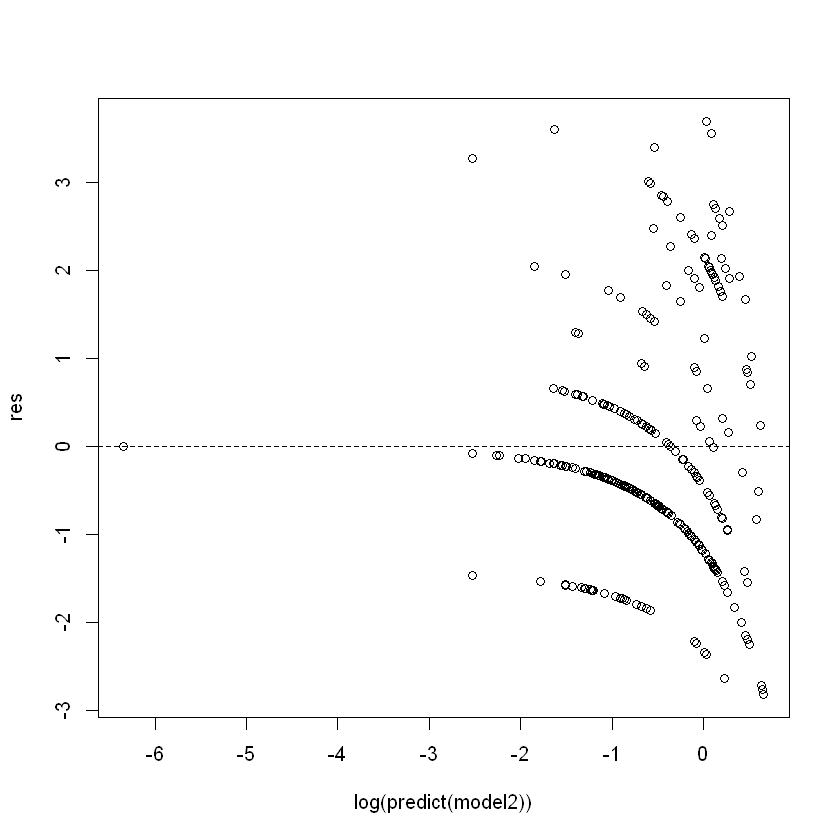

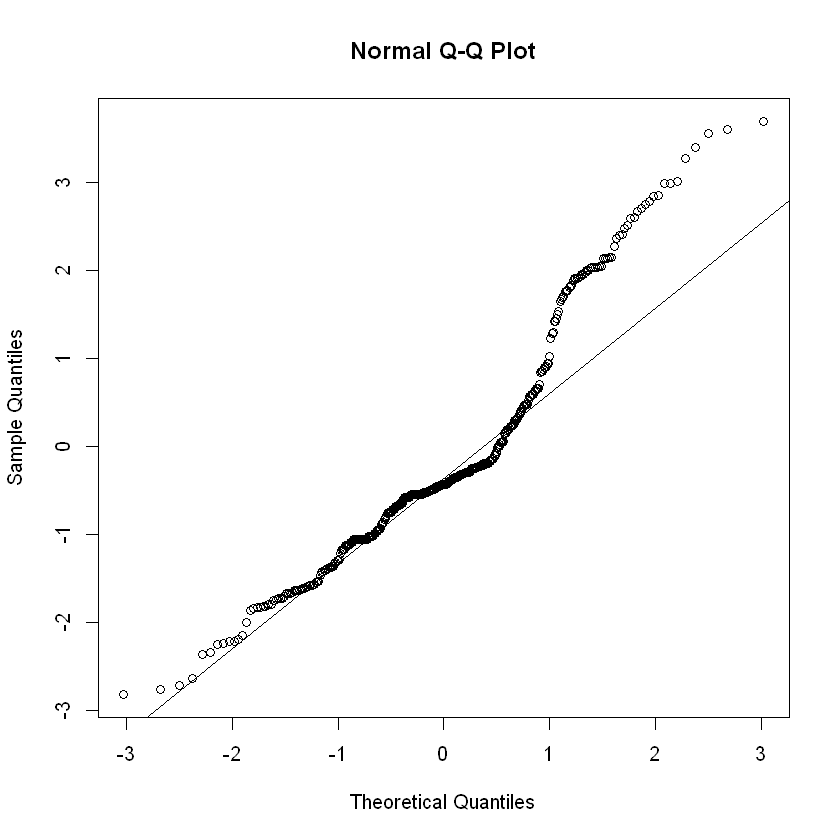

In [35]:
res = residuals(model2, type="deviance")
plot(log(predict(model2)), res)
abline(h=0, lty=2)
qqnorm(res)
qqline(res)